<a href="https://colab.research.google.com/github/furio1999/Computer-Vision/blob/main/GAN_fingerprints_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 

repo_path="/content/drive/MyDrive/computer vision/"

train_path="GAN_dataset/train"
test_path="GAN_dataset/test"
val_path= "GAN_dataset/val"

subpaths=[train_path, test_path, val_path]

GANs=["CramerGAN", "MMDGAN", "PROGAN", "SNGAN"]

# %cd /
# %cd {repo_path}
os.chdir(repo_path)

In [ ]:
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix
import PIL
from PIL import Image
import glob

# Helper Functions

In [ ]:
 def save_in_folder():
   return

# Re-sampling

## Codice di prova

In [ ]:
"""

batch_size=32
target_size=(8,8)
epochs=10
out_dir=repo_path + "GAN_downsampled/"
os.chdir(repo_path)
train_path2="train"
test_path2="test"
val_path2= "val"
#class dataset_generator
#TRAIN DATASET WITH AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    #zoom_range=0.5,\
    #brightness_range=(0.3,1.2),
    #rotation_range=30,\
    #width_shift_range=0.3,\
    #height_shift_range=0.3,\
    #horizontal_flip=True,\
    #vertical_flip=False,
    #fill_mode="nearest")
)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=out_dir + train_path2
    )

#VAL SPLIT WITHOUT AUGMENTATION
val_datagen = ImageDataGenerator(
    rescale = 1. / 255)

val_generator = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=out_dir + val_path2
)


#TEST DATASET
test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=out_dir + test_path2
)
"""

Found 200 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [ ]:
"""
batch_size=32
target_size=(128,128)
epochs=10
out_dir=repo_path + "GAN_downsampled/"
#class dataset_generator
#TRAIN DATASET WITH AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    #zoom_range=0.5,\
    #brightness_range=(0.3,1.2),
    #rotation_range=30,\
    #width_shift_range=0.3,\
    #height_shift_range=0.3,\
    #horizontal_flip=True,\
    #vertical_flip=False,
    #fill_mode="nearest")
)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

#VAL SPLIT WITHOUT AUGMENTATION
val_datagen = ImageDataGenerator(
    rescale = 1. / 255)

val_generator = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)


#TEST DATASET
test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)
"""

'\nbatch_size=32\ntarget_size=(128,128)\nepochs=10\nout_dir=repo_path + "GAN_downsampled/"\n#class dataset_generator\n#TRAIN DATASET WITH AUGMENTATION\ntrain_datagen = ImageDataGenerator(\n    rescale = 1. / 255,    #zoom_range=0.5,    #brightness_range=(0.3,1.2),\n    #rotation_range=30,    #width_shift_range=0.3,    #height_shift_range=0.3,    #horizontal_flip=True,    #vertical_flip=False,\n    #fill_mode="nearest")\n)\n\ntrain_generator = train_datagen.flow_from_directory(\n    directory=train_path,\n    target_size=target_size,\n    color_mode="rgb",\n    batch_size=batch_size,\n    class_mode="categorical",\n    shuffle=True)\n\n#VAL SPLIT WITHOUT AUGMENTATION\nval_datagen = ImageDataGenerator(\n    rescale = 1. / 255)\n\nval_generator = val_datagen.flow_from_directory(\n    directory=val_path,\n    target_size=target_size,\n    color_mode="rgb",\n    batch_size=batch_size,\n    class_mode="categorical",\n    shuffle=True\n)\n\n\n#TEST DATASET\ntest_datagen = ImageDataGenerator(\

## Versione definitiva

In [ ]:
## save resampled images
## more elegant than before
"""
def resample(batch_size,
target_size,
epochs,
out_dir,
train_path2,
test_path2,
val_path2):


  train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    #zoom_range=0.5,\
    #brightness_range=(0.3,1.2),
    #rotation_range=30,\
    #width_shift_range=0.3,\
    #height_shift_range=0.3,\
    #horizontal_flip=True,\
    #vertical_flip=False,
    #fill_mode="nearest")
   )

  train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=out_dir + train_path2
    )


  dir=val_path2
  if not os.path.exists(dir):
    os.mkdir(dir)
    print("Directory " , dir ,  " Created ")
  else:    
    pass


  #VAL SPLIT WITHOUT AUGMENTATION
  val_datagen = ImageDataGenerator(
    rescale = 1. / 255)

  val_generator = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=out_dir + val_path2
  )

  dir=train_path2
  if not os.path.exists(dir):
    os.mkdir(dir)
    print("Directory " , dir ,  " Created ")
  else:    
    pass

#TEST DATASET
  test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

  test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=out_dir + test_path2
  )

def check_dir(dir):
  if not os.path.exists(dir):
    os.mkdir(dir)
    os.chdir(dir)
    print("Directory " , dir ,  " Created ")
  else:    
    os.chdir(dir)

"""

In [ ]:
"""

batch_size=32,
target_size=(8,8),
epochs=10,
out_dir=repo_path + "GAN_downsampled"
check_dir(out_dir)

train_path2="train"
test_path2="test"
val_path2= "val"
!pwd
for GAN in GANs:
  check_dir(train_path2)
  train_path2=train_path2 + "/" + GAN
  check_dir(GAN)
  
  os.chdir(out_dir)
  check_dir(test_path2)
  test_path2=test_path2 + "/" + GAN
  check_dir(GAN)
  
  os.chdir(out_dir)
  check_dir(val_path2)
  val_path2= val_path2 + "/" + GAN
  check_dir(GAN)
  
  os.chdir(out_dir)
  resample(batch_size,target_size,epochs,out_dir,
  train_path2,test_path2,val_path2)

  """

Directory  /content/drive/MyDrive/computer vision/GAN_downsampled  Created 
/content/drive/MyDrive/computer vision/GAN_downsampled
Directory  train  Created 
Directory  CramerGAN  Created 
Directory  test  Created 
Directory  CramerGAN  Created 
Directory  val  Created 
Directory  CramerGAN  Created 


FileNotFoundError: ignored

## Gaussian pyramid

In [ ]:
import scipy
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray

In [ ]:
def getResidual(img):
  blur_img=gaussian_filter(img, sigma=3)
  res=np.array(img)-np.array(blur_img)
  return res

def downsample(img, factor=0.5):
  new_img=scipy.ndimage.zoom(img, factor, order=3)
  return new_img

In [ ]:
def pyramid(img, levels=3):

  #generate residuals

  residuals=[]
  originals=[]
  imgs=[]

  #setup img to plot
  #fig, axs = plt.subplots(levels,1,figsize=(10,10))
  #fig.suptitle("residuals")

  image=img
  image = cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY)
  for i in range(levels):
    img1=np.array(image)
    originals.append(image)

    image=gaussian_filter(image, sigma=3) #avoid aliasing
    new_image=downsample(image)
  
    #axs[i].imshow(img1)
    image=new_image

#image at lowest resolution
  low_image=image


#Restore image from residuals
  img=low_image
  #fig, axs = plt.subplots(levels,figsize=(10,10))
  #fig.suptitle("image restoration")

  for i in range(levels):
    original=originals[levels-i-1]

    size=np.shape(original)
  #sometimes the dimension of upsample(img) and the residual are different  so I need to resize
    try:
     upsample_blur=cv2.resize(gaussian_filter(img,sigma=3),dsize=size)
    except:
      print("size: ", size)
      upsample_blur=original

    im_diff=np.minimum(original-upsample_blur, 255)
    imgs.append(im_diff)
  #view image restored
    #axs[i].imshow(im_diff,cmap="gray")
   
  return imgs


## Creation of images for every module

In [ ]:
#model2 
def create_images2(img):
  factor=8/128
  blur=gaussian_filter(img, sigma=3)
  blur = cv2.cvtColor(np.float32(blur), cv2.COLOR_BGR2GRAY)
  im=downsample(blur, factor=0.5)
  cv2_imshow(im)
  im=Image.fromarray(im)
  im=im.convert("L")
  return im

size:  (0, 0)
size:  (0, 0)
size:  (0, 0)
size:  (0, 0)
size:  (0, 0)
size:  (0, 0)
size:  (0, 0)
size:  (0, 0)
size:  (1, 1)
size:  (2, 2)
size:  (4, 4)
size:  (8, 8)
size:  (16, 16)
size:  (32, 32)
size:  (64, 64)
size:  (128, 128)


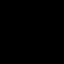

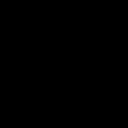

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#model 3
def create_images3(img):
  levels=np.int(128/8)
  images=pyramid(img, levels=levels)
  image_up=images[levels-2]
  image_down=images[levels-1]
  cv2_imshow(image_up)
  cv2_imshow(image_down)
  return image_down

create_images3(img)

['CRAMER_00000042.png', 'CRAMER_00000040.png', 'CRAMER_00000049.png', 'CRAMER_00000047.png', 'CRAMER_00000044.png', 'CRAMER_00000046.png', 'CRAMER_00000041.png', 'CRAMER_00000048.png', 'CRAMER_00000039.png', 'CRAMER_00000043.png', 'CRAMER_00000045.png', 'CRAMER_00000036.png', 'CRAMER_00000030.png', 'CRAMER_00000026.png', 'CRAMER_00000028.png', 'CRAMER_00000020.png', 'CRAMER_00000021.png', 'CRAMER_00000037.png', 'CRAMER_00000025.png', 'CRAMER_00000033.png', 'CRAMER_00000024.png', 'CRAMER_00000031.png', 'CRAMER_00000034.png', 'CRAMER_00000023.png', 'CRAMER_00000032.png', 'CRAMER_00000029.png', 'CRAMER_00000035.png', 'CRAMER_00000022.png', 'CRAMER_00000038.png', 'CRAMER_00000027.png', 'CRAMER_00000014.png', 'CRAMER_00000012.png', 'CRAMER_00000004.png', 'CRAMER_00000003.png', 'CRAMER_00000007.png', 'CRAMER_00000001.png', 'CRAMER_00000005.png', 'CRAMER_00000008.png', 'CRAMER_00000013.png', 'CRAMER_00000015.png', 'CRAMER_00000009.png', 'CRAMER_00000019.png', 'CRAMER_00000011.png', 'CRAMER_00

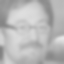

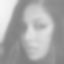

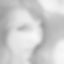

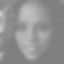

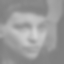

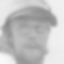

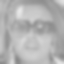

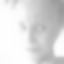

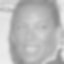

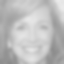

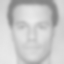

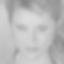

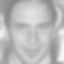

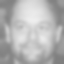

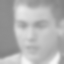

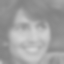

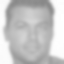

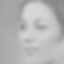

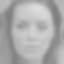

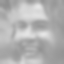

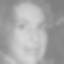

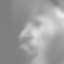

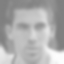

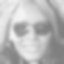

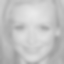

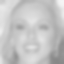

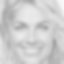

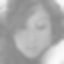

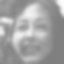

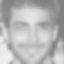

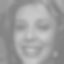

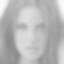

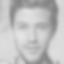

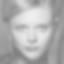

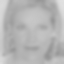

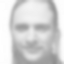

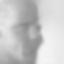

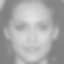

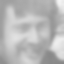

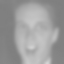

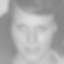

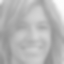

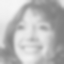

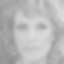

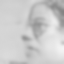

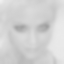

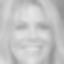

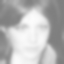

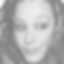

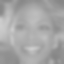

['MMD_00000000.png', 'MMD_00000008.png', 'MMD_00000006.png', 'MMD_00000003.png', 'MMD_00000007.png', 'MMD_00000001.png', 'MMD_00000004.png', 'MMD_00000009.png', 'MMD_00000002.png', 'MMD_00000005.png', 'MMD_00000047.png', 'MMD_00000049.png', 'MMD_00000044.png', 'MMD_00000036.png', 'MMD_00000048.png', 'MMD_00000043.png', 'MMD_00000034.png', 'MMD_00000033.png', 'MMD_00000045.png', 'MMD_00000040.png', 'MMD_00000025.png', 'MMD_00000046.png', 'MMD_00000030.png', 'MMD_00000027.png', 'MMD_00000035.png', 'MMD_00000029.png', 'MMD_00000032.png', 'MMD_00000037.png', 'MMD_00000041.png', 'MMD_00000039.png', 'MMD_00000026.png', 'MMD_00000042.png', 'MMD_00000031.png', 'MMD_00000028.png', 'MMD_00000038.png', 'MMD_00000017.png', 'MMD_00000023.png', 'MMD_00000020.png', 'MMD_00000010.png', 'MMD_00000016.png', 'MMD_00000022.png', 'MMD_00000015.png', 'MMD_00000019.png', 'MMD_00000024.png', 'MMD_00000011.png', 'MMD_00000014.png', 'MMD_00000012.png', 'MMD_00000021.png', 'MMD_00000013.png', 'MMD_00000018.png']

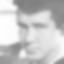

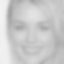

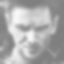

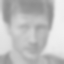

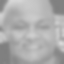

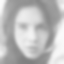

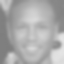

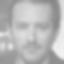

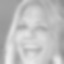

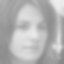

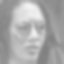

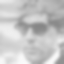

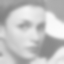

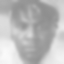

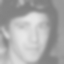

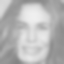

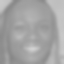

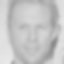

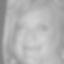

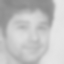

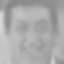

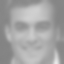

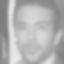

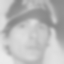

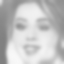

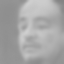

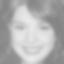

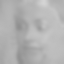

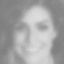

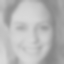

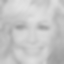

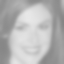

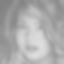

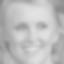

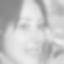

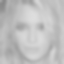

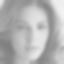

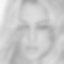

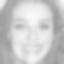

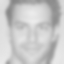

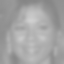

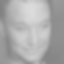

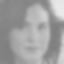

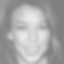

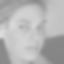

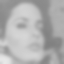

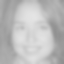

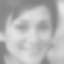

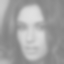

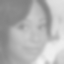

['ProGAN_00000034.png', 'ProGAN_00000044.png', 'ProGAN_00000031.png', 'ProGAN_00000046.png', 'ProGAN_00000039.png', 'ProGAN_00000035.png', 'ProGAN_00000036.png', 'ProGAN_00000040.png', 'ProGAN_00000043.png', 'ProGAN_00000032.png', 'ProGAN_00000041.png', 'ProGAN_00000033.png', 'ProGAN_00000047.png', 'ProGAN_00000038.png', 'ProGAN_00000042.png', 'ProGAN_00000045.png', 'ProGAN_00000048.png', 'ProGAN_00000037.png', 'ProGAN_00000030.png', 'ProGAN_00000049.png', 'ProGAN_00000006.png', 'ProGAN_00000014.png', 'ProGAN_00000022.png', 'ProGAN_00000008.png', 'ProGAN_00000012.png', 'ProGAN_00000020.png', 'ProGAN_00000021.png', 'ProGAN_00000011.png', 'ProGAN_00000026.png', 'ProGAN_00000010.png', 'ProGAN_00000028.png', 'ProGAN_00000015.png', 'ProGAN_00000013.png', 'ProGAN_00000009.png', 'ProGAN_00000018.png', 'ProGAN_00000025.png', 'ProGAN_00000005.png', 'ProGAN_00000024.png', 'ProGAN_00000016.png', 'ProGAN_00000027.png', 'ProGAN_00000007.png', 'ProGAN_00000023.png', 'ProGAN_00000029.png', 'ProGAN_00

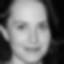

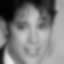

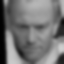

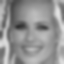

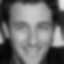

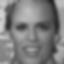

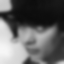

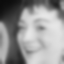

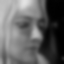

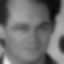

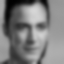

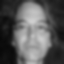

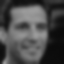

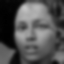

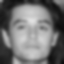

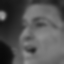

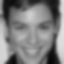

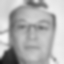

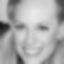

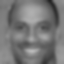

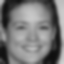

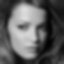

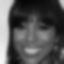

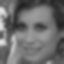

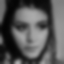

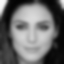

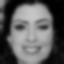

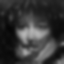

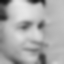

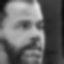

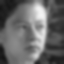

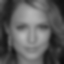

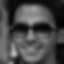

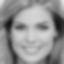

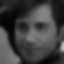

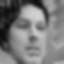

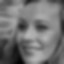

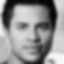

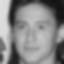

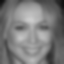

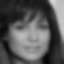

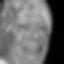

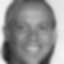

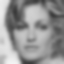

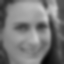

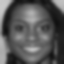

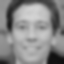

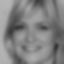

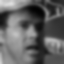

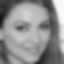

['SNGAN_00000037.png', 'SNGAN_00000045.png', 'SNGAN_00000035.png', 'SNGAN_00000049.png', 'SNGAN_00000043.png', 'SNGAN_00000038.png', 'SNGAN_00000039.png', 'SNGAN_00000048.png', 'SNGAN_00000047.png', 'SNGAN_00000046.png', 'SNGAN_00000041.png', 'SNGAN_00000040.png', 'SNGAN_00000036.png', 'SNGAN_00000044.png', 'SNGAN_00000042.png', 'SNGAN_00000018.png', 'SNGAN_00000014.png', 'SNGAN_00000021.png', 'SNGAN_00000011.png', 'SNGAN_00000010.png', 'SNGAN_00000028.png', 'SNGAN_00000023.png', 'SNGAN_00000016.png', 'SNGAN_00000022.png', 'SNGAN_00000030.png', 'SNGAN_00000020.png', 'SNGAN_00000015.png', 'SNGAN_00000031.png', 'SNGAN_00000017.png', 'SNGAN_00000029.png', 'SNGAN_00000027.png', 'SNGAN_00000026.png', 'SNGAN_00000019.png', 'SNGAN_00000032.png', 'SNGAN_00000033.png', 'SNGAN_00000013.png', 'SNGAN_00000012.png', 'SNGAN_00000034.png', 'SNGAN_00000024.png', 'SNGAN_00000025.png', 'SNGAN_00000001.png', 'SNGAN_00000006.png', 'SNGAN_00000003.png', 'SNGAN_00000005.png', 'SNGAN_00000000.png', 'SNGAN_00

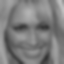

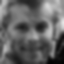

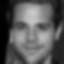

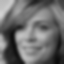

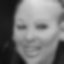

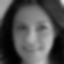

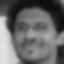

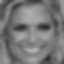

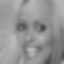

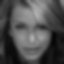

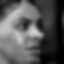

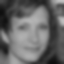

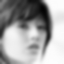

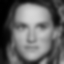

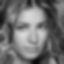

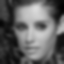

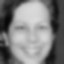

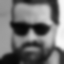

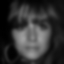

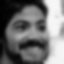

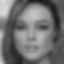

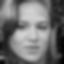

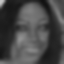

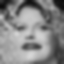

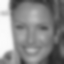

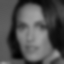

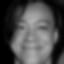

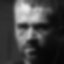

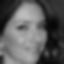

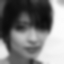

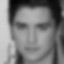

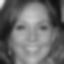

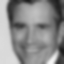

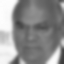

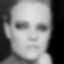

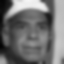

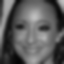

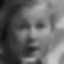

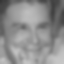

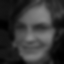

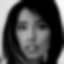

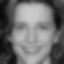

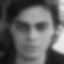

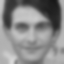

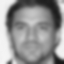

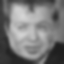

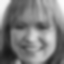

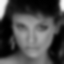

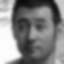

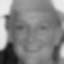

['CRAMER_00000006.png', 'CRAMER_00000007.png', 'CRAMER_00000009.png', 'CRAMER_00000008.png', 'CRAMER_00000001.png', 'CRAMER_00000002.png', 'CRAMER_00000000.png', 'CRAMER_00000004.png', 'CRAMER_00000003.png', 'CRAMER_00000005.png']


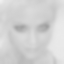

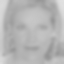

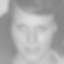

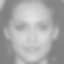

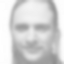

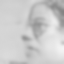

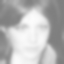

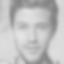

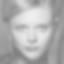

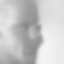

['MMD_00000001.png', 'MMD_00000004.png', 'MMD_00000000.png', 'MMD_00000003.png', 'MMD_00000006.png', 'MMD_00000008.png', 'MMD_00000007.png', 'MMD_00000005.png', 'MMD_00000009.png', 'MMD_00000002.png']


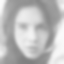

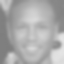

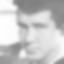

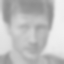

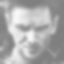

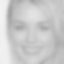

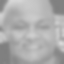

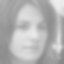

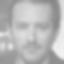

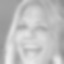

['ProGAN_00000008.png', 'ProGAN_00000005.png', 'ProGAN_00000007.png', 'ProGAN_00000009.png', 'ProGAN_00000006.png', 'ProGAN_00000004.png', 'ProGAN_00000001.png', 'ProGAN_00000000.png', 'ProGAN_00000003.png', 'ProGAN_00000002.png']


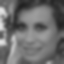

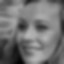

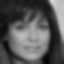

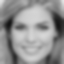

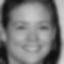

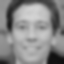

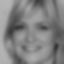

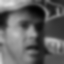

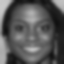

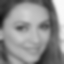

['SNGAN_00000009.png', 'SNGAN_00000004.png', 'SNGAN_00000006.png', 'SNGAN_00000002.png', 'SNGAN_00000005.png', 'SNGAN_00000003.png', 'SNGAN_00000000.png', 'SNGAN_00000008.png', 'SNGAN_00000001.png', 'SNGAN_00000007.png']


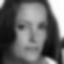

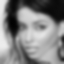

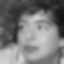

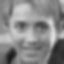

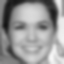

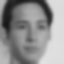

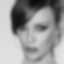

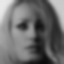

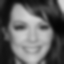

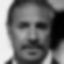

['CRAMER_00000003.png', 'CRAMER_00000000.png', 'CRAMER_00000007.png', 'CRAMER_00000008.png', 'CRAMER_00000005.png', 'CRAMER_00000006.png', 'CRAMER_00000004.png', 'CRAMER_00000001.png', 'CRAMER_00000002.png', 'CRAMER_00000009.png']


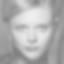

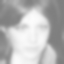

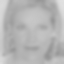

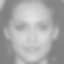

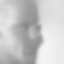

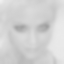

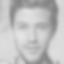

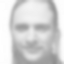

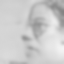

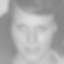

['MMD_00000005.png', 'MMD_00000009.png', 'MMD_00000008.png', 'MMD_00000006.png', 'MMD_00000007.png', 'MMD_00000002.png', 'MMD_00000001.png', 'MMD_00000004.png', 'MMD_00000000.png', 'MMD_00000003.png']


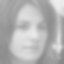

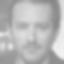

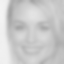

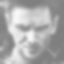

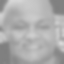

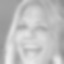

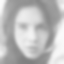

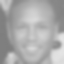

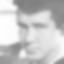

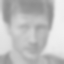

['ProGAN_00000007.png', 'ProGAN_00000005.png', 'ProGAN_00000009.png', 'ProGAN_00000002.png', 'ProGAN_00000003.png', 'ProGAN_00000001.png', 'ProGAN_00000008.png', 'ProGAN_00000000.png', 'ProGAN_00000004.png', 'ProGAN_00000006.png']


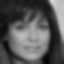

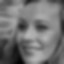

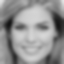

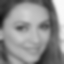

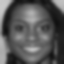

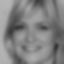

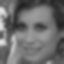

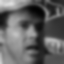

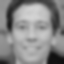

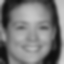

['SNGAN_00000008.png', 'SNGAN_00000003.png', 'SNGAN_00000006.png', 'SNGAN_00000001.png', 'SNGAN_00000004.png', 'SNGAN_00000002.png', 'SNGAN_00000009.png', 'SNGAN_00000000.png', 'SNGAN_00000005.png', 'SNGAN_00000007.png']


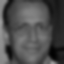

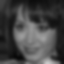

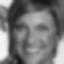

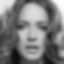

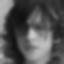

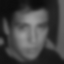

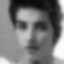

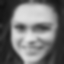

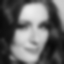

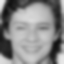

In [ ]:


subpaths2=["GAN_downsampled/train",  "GAN_downsampled/test", "GAN_downsampled/val"]
os.chdir(repo_path)
i=0
for subpath in subpaths:
  for GAN in GANs:
    path= repo_path + subpath + "/" + GAN
    path2= repo_path + subpaths2[i] +"/" + GAN
    if os.path.isdir(path2) == False:
      os.mkdir(path2)

    #listdir parte sempre dal primo?
    print(os.listdir(path))
    for f in os.listdir(path):
      im=Image.open(os.path.join(path,f))
      img=np.array(im)
      im=create_images2(img)
      im.save(os.path.join(path2,f))

  i+=1



In [ ]:
#train_generator2, test_generator2, val_generator2 = create_dataset(repo_path + "GAN_downsampled")

Found 200 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


TypeError: ignored

In [ ]:
os.chdir(repo_path)
subpaths3=["GAN_pyramid/train",  "GAN_pyramid/test", "GAN_pyramid/val"]
    if os.path.isdir("GAN_pyramid") == False:
      os.mkdir("GAN_pyramid")
i=0
for subpath in subpaths:
  if os.path.isdir(repo_path + "/" + subpath) == False:
      os.mkdir(repo_path + "/" + subpath)
      
  for GAN in GANs:
    path= repo_path + subpath + "/" + GAN
    path2= repo_path + subpaths3[i] +"/" + GAN
    if os.path.isdir(path2) == False:
      os.mkdir(path2)

    #listdir parte sempre dal primo?
    print(os.listdir(path))
    for f in os.listdir(path):
      im=Image.open(os.path.join(path,f))
      img=np.array(im)
      im=create_images3(img)
      im.save(os.path.join(path2,f))

  i+=1

IndentationError: ignored

In [ ]:
  #def create_dataset(path):
  path=repo_path + "GAN_downsampled"
  batch_size=32
  target_size=(128,128)
  epochs=10
  out_dir=path
  os.chdir(path)
  train_path="train"
  test_path="test"
  val_path= "val"
#class dataset_generator
#TRAIN DATASET WITH AUGMENTATION
  train_datagen = ImageDataGenerator(
    rescale = 1. / 255,\
    #zoom_range=0.5,\
    #brightness_range=(0.3,1.2),
    #rotation_range=30,\
    #width_shift_range=0.3,\
    #height_shift_range=0.3,\
    #horizontal_flip=True,\
    #vertical_flip=False,
    #fill_mode="nearest")
)

  train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=train_path
    )

#VAL SPLIT WITHOUT AUGMENTATION
  val_datagen = ImageDataGenerator(
    rescale = 1. / 255)

  val_generator = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=val_path
)


#TEST DATASET
  test_datagen = ImageDataGenerator(
    rescale = 1. / 255)

  test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    save_to_dir=test_path
)
  
  #return train_generator, test_generator, val_generator


Found 200 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


# CNN Models

In [ ]:
#train_generator, test_generator, val_generator = train_generator2, test_generator2, val_generator2

In [ ]:
num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape

classnames = [k for k,v in train_generator.class_indices.items()]

print(classnames)

n_classes=len(classnames)

['CramerGAN', 'MMDGAN', 'PROGAN', 'SNGAN']


In [ ]:
input_shape1=(128, 128, 3)
model = Sequential([
  #data_augmentation
  # layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding="same", activation='relu', input_shape=input_shape1),
  layers.Conv2D(32, 3, strides=2, padding="same", activation='relu'),
  layers.Conv2D(64, 3, strides=2,  padding="same", activation='relu'),
  layers.Conv2D(128, 3, strides=2, padding="same", activation='relu'),
  layers.Conv2D(256, 3, strides=2,  padding="same", activation='relu'),
  layers.Conv2D(512, 3, strides=2, padding="same", activation='relu'),
  layers.Conv2D(512, 3, strides=4, padding="same", activation='relu'),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='softmax'),
  layers.Dense(n_classes)  #num_classes
])

In [ ]:
input_shape2=(8,8,3)
model2 = Sequential([
  #data_augmentation
  # layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(256, 3, padding="same", activation='relu', input_shape=input_shape2),
  layers.Conv2D(512, 3, strides=2, padding="same", activation='relu'),
  layers.Conv2D(512, 3, strides=4, padding="same", activation='relu'),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='softmax'),
  layers.Dense(n_classes)  #num_classes
])

In [ ]:
input_shape3=(16,16,3)
model3 = Sequential([
  #data_augmentation
  # layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(128, 3, padding="same", activation='relu', input_shape=input_shape3),
  layers.Conv2D(256, 3, strides=2,  padding="same", activation='relu'),
  layers.Conv2D(512, 3, strides=2, padding="same", activation='relu'),
  layers.Conv2D(512, 3, strides=4, padding="same", activation='relu'),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='softmax'),
  layers.Dense(n_classes)  #num_classes
])

In [ ]:
model4= Sequential([
  #data_augmentation
  # layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding="same", activation='relu', input_shape=input_shape1),
  layers.Conv2D(32, 3, strides=2, padding="same", activation='relu'),
  layers.Conv2D(512, 3,  padding="same", activation='relu'),
  layers.Conv2D(n_classes, 3,  padding="same", activation='relu'),
  layers.AveragePooling2D(),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(n_classes, activation='softmax'),
  layers.Dense(n_classes),  #num_classes
])

# Training and Evaluation

In [ ]:
model=model2
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 8, 8, 256)         7168      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 512)         1180160   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 512)         2359808   
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 3,811,844
Trainable params: 3,811,844
Non-trainable params: 0
____________________________________________

In [ ]:
steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=val_generator.n//val_generator.batch_size+1
history=model.fit(train_generator, validation_data=val_generator, steps_per_epoch=steps_per_epoch, validation_steps=val_steps) 

InvalidArgumentError: ignored

In [ ]:
test_steps=test_generator.n//test_generator.batch_size+1

preds = model.predict(test_generator,verbose=1,steps=test_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_generator

print(classification_report(Ytest, Ypred, labels=None, target_names=classnames, digits=3))

# print('\nTest accuracy:', test_acc)

print(history.history.keys())

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()